`STUDENT NAME: MITCHELLE MORAA`

**Data Handling**: Uses *Pandas* and *NumPy* to load, clean, transform, and analyze data.

**Visualization**: Uses *Matplotlib* and *Seaborn* to create graphs, charts, and plots to understand the data visually.

**File Input/Output**: Installs and imports *openpyxl* to ensure compatibility with modern Excel spreadsheet files (.xlsx).

**Presentation**: Installs and imports *tabulate* to easily print data in a well-formatted, readable table 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl
import openpyxl
!pip install tabulate
import tabulate

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**READ AND DISPLAY THE DATA**

In [2]:
df = pd.read_excel("C:/Users/USER/Downloads/Group_work_cleaned.xlsx")
df.head()


,location_id,location_name,year,age_group_id,age_group_name,sex_id,sex_name,cause_name,metric,unit,mean,lower,upper,upper_deviation_pct
0,1,Global,2000,27,Age-standardized,1,Males,Tuberculosis,Deaths,"Rate per 100,000",41.000000,37.1,45.5,10.975610
1,1,Global,2000,27,Age-standardized,1,Males,Tuberculosis,Prevalence,"Rate per 100,000",260.299988,252.1,268.6,3.188633
2,1,Global,2000,27,Age-standardized,2,Females,Tuberculosis,Deaths,"Rate per 100,000",22.900000,19.0,24.9,8.733626
3,1,Global,2000,27,Age-standardized,2,Females,Tuberculosis,Prevalence,"Rate per 100,000",123.099998,119.5,126.9,3.086922
4,1,Global,2000,27,Age-standardized,3,Both sexes,Tuberculosis,Deaths,"Rate per 100,000",31.200001,28.4,33.5,7.371792


**CORRELATION EXPLORATORY DATA ANALYSIS**

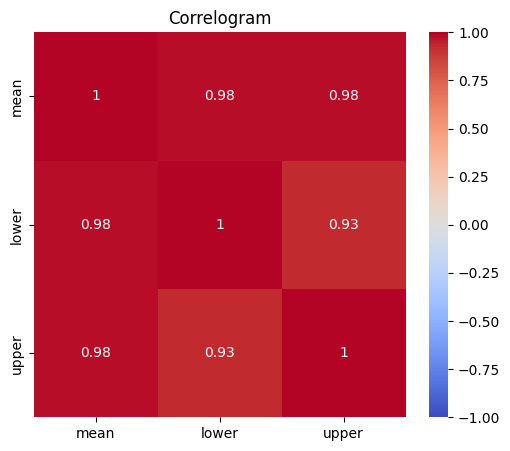

In [88]:
corr = df[["mean", "lower", "upper"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlogram")
plt.show()


*mean and lower*	0.98	`Very Strong Positive Correlation`. As the mean value increases, the lower value tends to increase very strongly.

*mean and upper*	0.98	`Very Strong Positive Correlation`. As the mean value increases, the upper value tends to increase very strongly.

*lower and upper*	0.93	`Strong Positive Correlation`. As the lower value increases, the upper value tends to increase strongly.

**High Multicollinearity** 

All three variables are very highly and positively correlated with each other. 

This suggests that the variables mean, lower, and upper are measuring largely the same underlying information or that they are highly redundant if used 

together in a predictive model a common issue known as *multicollinearity*. 

If one value changes, the others are highly likely to change in the same direction and magnitude.

In [5]:
pivot = df.pivot_table(
    index=["location_name","year","age_group_name","sex_name","cause_name"],
    columns="metric",
    values="mean"
).reset_index()
corr = pivot[["Deaths", "Prevalence"]].corr()
print(corr)

metric        Deaths  Prevalence
metric                          
Deaths      1.000000    0.334951
Prevalence  0.334951    1.000000


The correlation coefficient between Deaths and Prevalence is approximately 0.335.

Since the value is positive, it indicates that as Prevalence increases, the number of Deaths tends to slightly increase, and vice versa.

However, a value of **r≈0.33** is typically considered a weak to moderate correlation. 
    
This means that while there is a linear relationship, Prevalence is not a strong predictor of Deaths, and other factors are likely influencing the death rate significantly. 
    
There is only a modest shared variance between the two metrics.

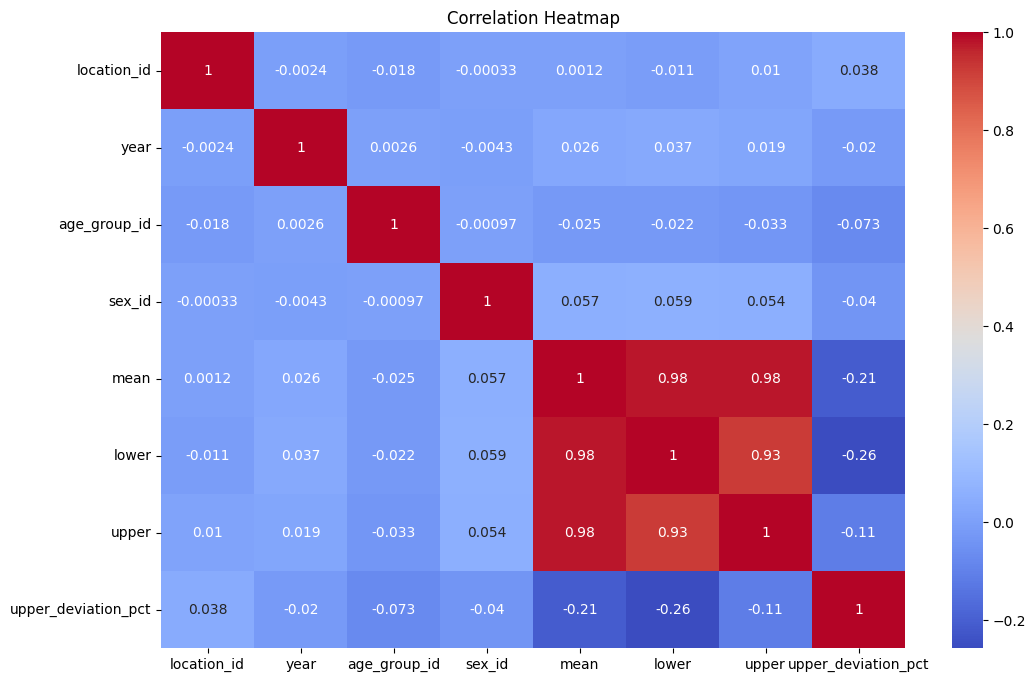

In [6]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Correlations with upper_deviation_pct**

This variable shows a negative relationship with the three range variables, but the strength is only moderate at best.

* mean and upper_deviation_pct -0.21, weak Negative Correlation. As the mean increases, the deviation percentage slightly decreases. 

* lower and upper_deviation_pct -0.26, weak to Moderate Negative Correlation.  

* upper and upper_deviation_pct -0.11, very Weak Negative Correlation. 

* age_group_id and upper_deviation_pct -0.073, negligible Negative Correlation. 

All other variables *location_id, year, age_group_id, sex_id* show an extremely weak correlation close to zero with every other variable, 

* location_id and year	-0.0024, virtually no linear relationship.

* age_group_id and mean	-0.025,	virtually no linear relationship.

* year and lower	0.037,	negligible Positive Correlation.

This suggests that the demographic and temporal variables are linearly independent of the core measurement variables.

**DISTRIBUTIONS EXPLORATORY DATA ANALYSIS**

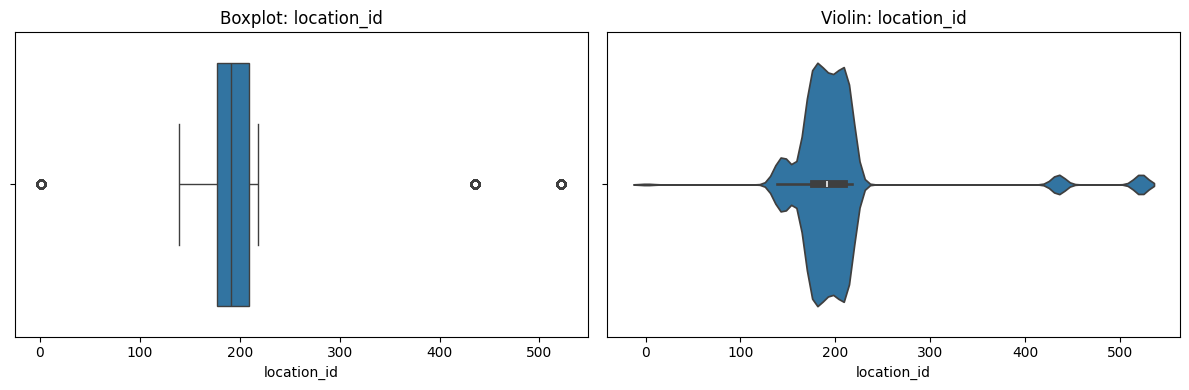

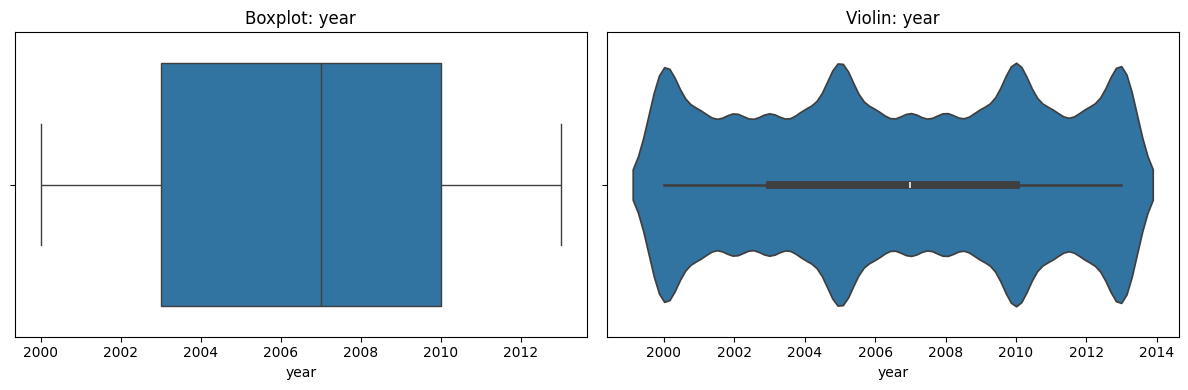

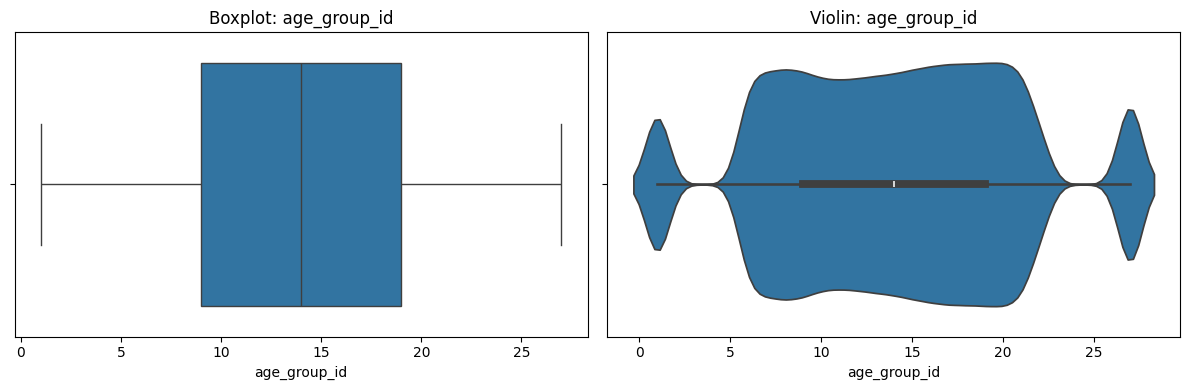

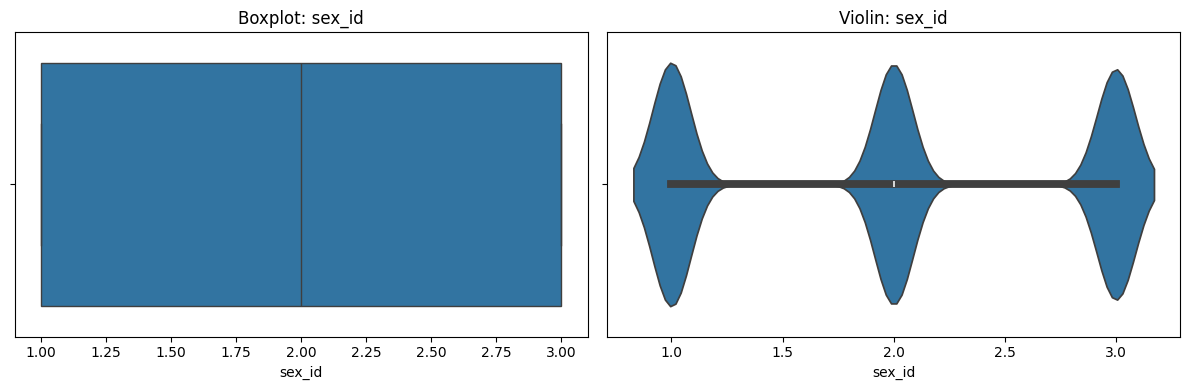

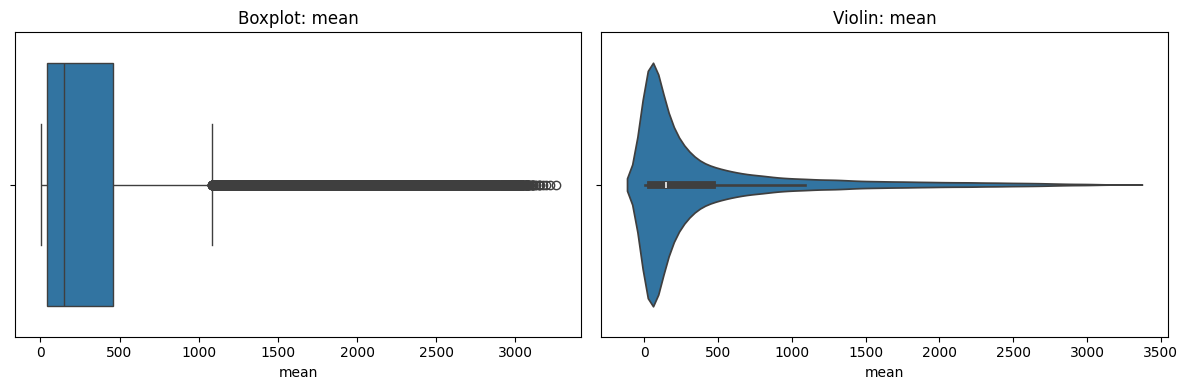

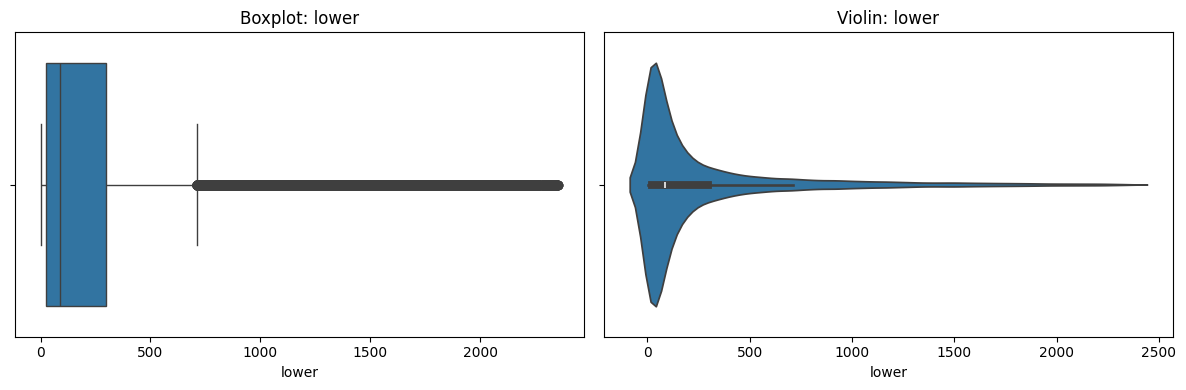

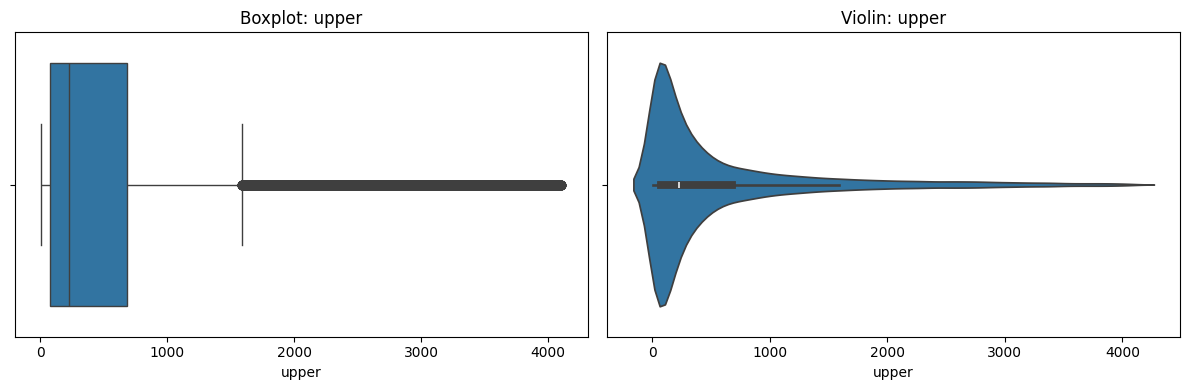

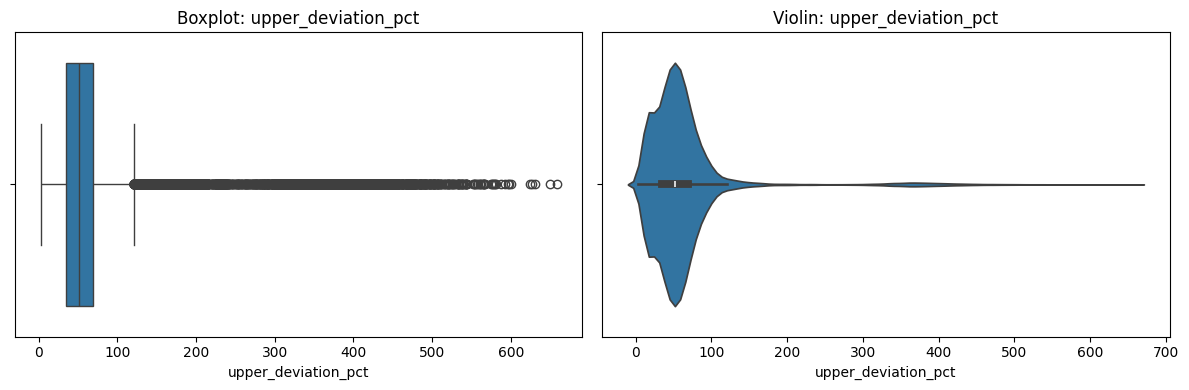

In [7]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x=df[col], ax=ax[0])
    ax[0].set_title(f"Boxplot: {col}")

    sns.violinplot(x=df[col], ax=ax[1])
    ax[1].set_title(f"Violin: {col}")

    plt.tight_layout()
    plt.show()

In [72]:
df[num_cols].skew()

location_id            3.634495
year                  -0.046756
age_group_id           0.016282
sex_id                 0.033710
mean                   2.241917
lower                  2.440917
upper                  2.165568
upper_deviation_pct    4.392026
dtype: float64

**Skew<0.5: Approximately Symmetrical**

**0.5≤Skew≤1: Moderately Skewed**

**Skew>1: Highly Skewed**

Variables related to demographics and time year, age_group_id, sex_id exhibit very low skewness near symmetry, suggesting they are uniformly or 

`normally distributed` across their ranges.

The measurement variables mean, lower, upper, location_id, upper_deviation_pct exhibit high positive skewness, **Skew ≥2.** 

**This is common for data where values are bounded by zero but have a long tail of large, infrequent values.**
    
Data transformations Such as taking the **log()** or sqrt()​ of the data are often applied before using them in linear statistical models, as many models assume the variables are normally distributed.

In [71]:
df[num_cols].kurt()

location_id            14.016726
year                   -1.245754
age_group_id           -0.400415
sex_id                 -1.492408
mean                    4.837810
lower                   6.021771
upper                   4.478446
upper_deviation_pct    23.029337
dtype: float64

**Positive Excess Kurtosis (Leptokurtic)**

Indicates heavier tails and a sharper peak than a normal distribution. This means there are more outliers or extreme values.

**Zero Excess Kurtosis (Mesokurtic)** 

Matches the tails and peak of a normal distribution.

**Negative Excess Kurtosis (Platykurtic)**

Indicates lighter tails and a flatter peak than a normal distribution. This means there are fewer outliers or extreme values.

Measurement Variables location_id, mean, lower, upper, upper_deviation_pct: **All show high positive Kurtosis (Leptokurtic).** 

`The high kurtosis indicates that the long positive tail is composed of a significant number of extreme, high-magnitude outliers`

C:\Users\USER\AppData\Local\Temp\ipykernel_6560\445101550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\445101550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\445101550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\445101550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and

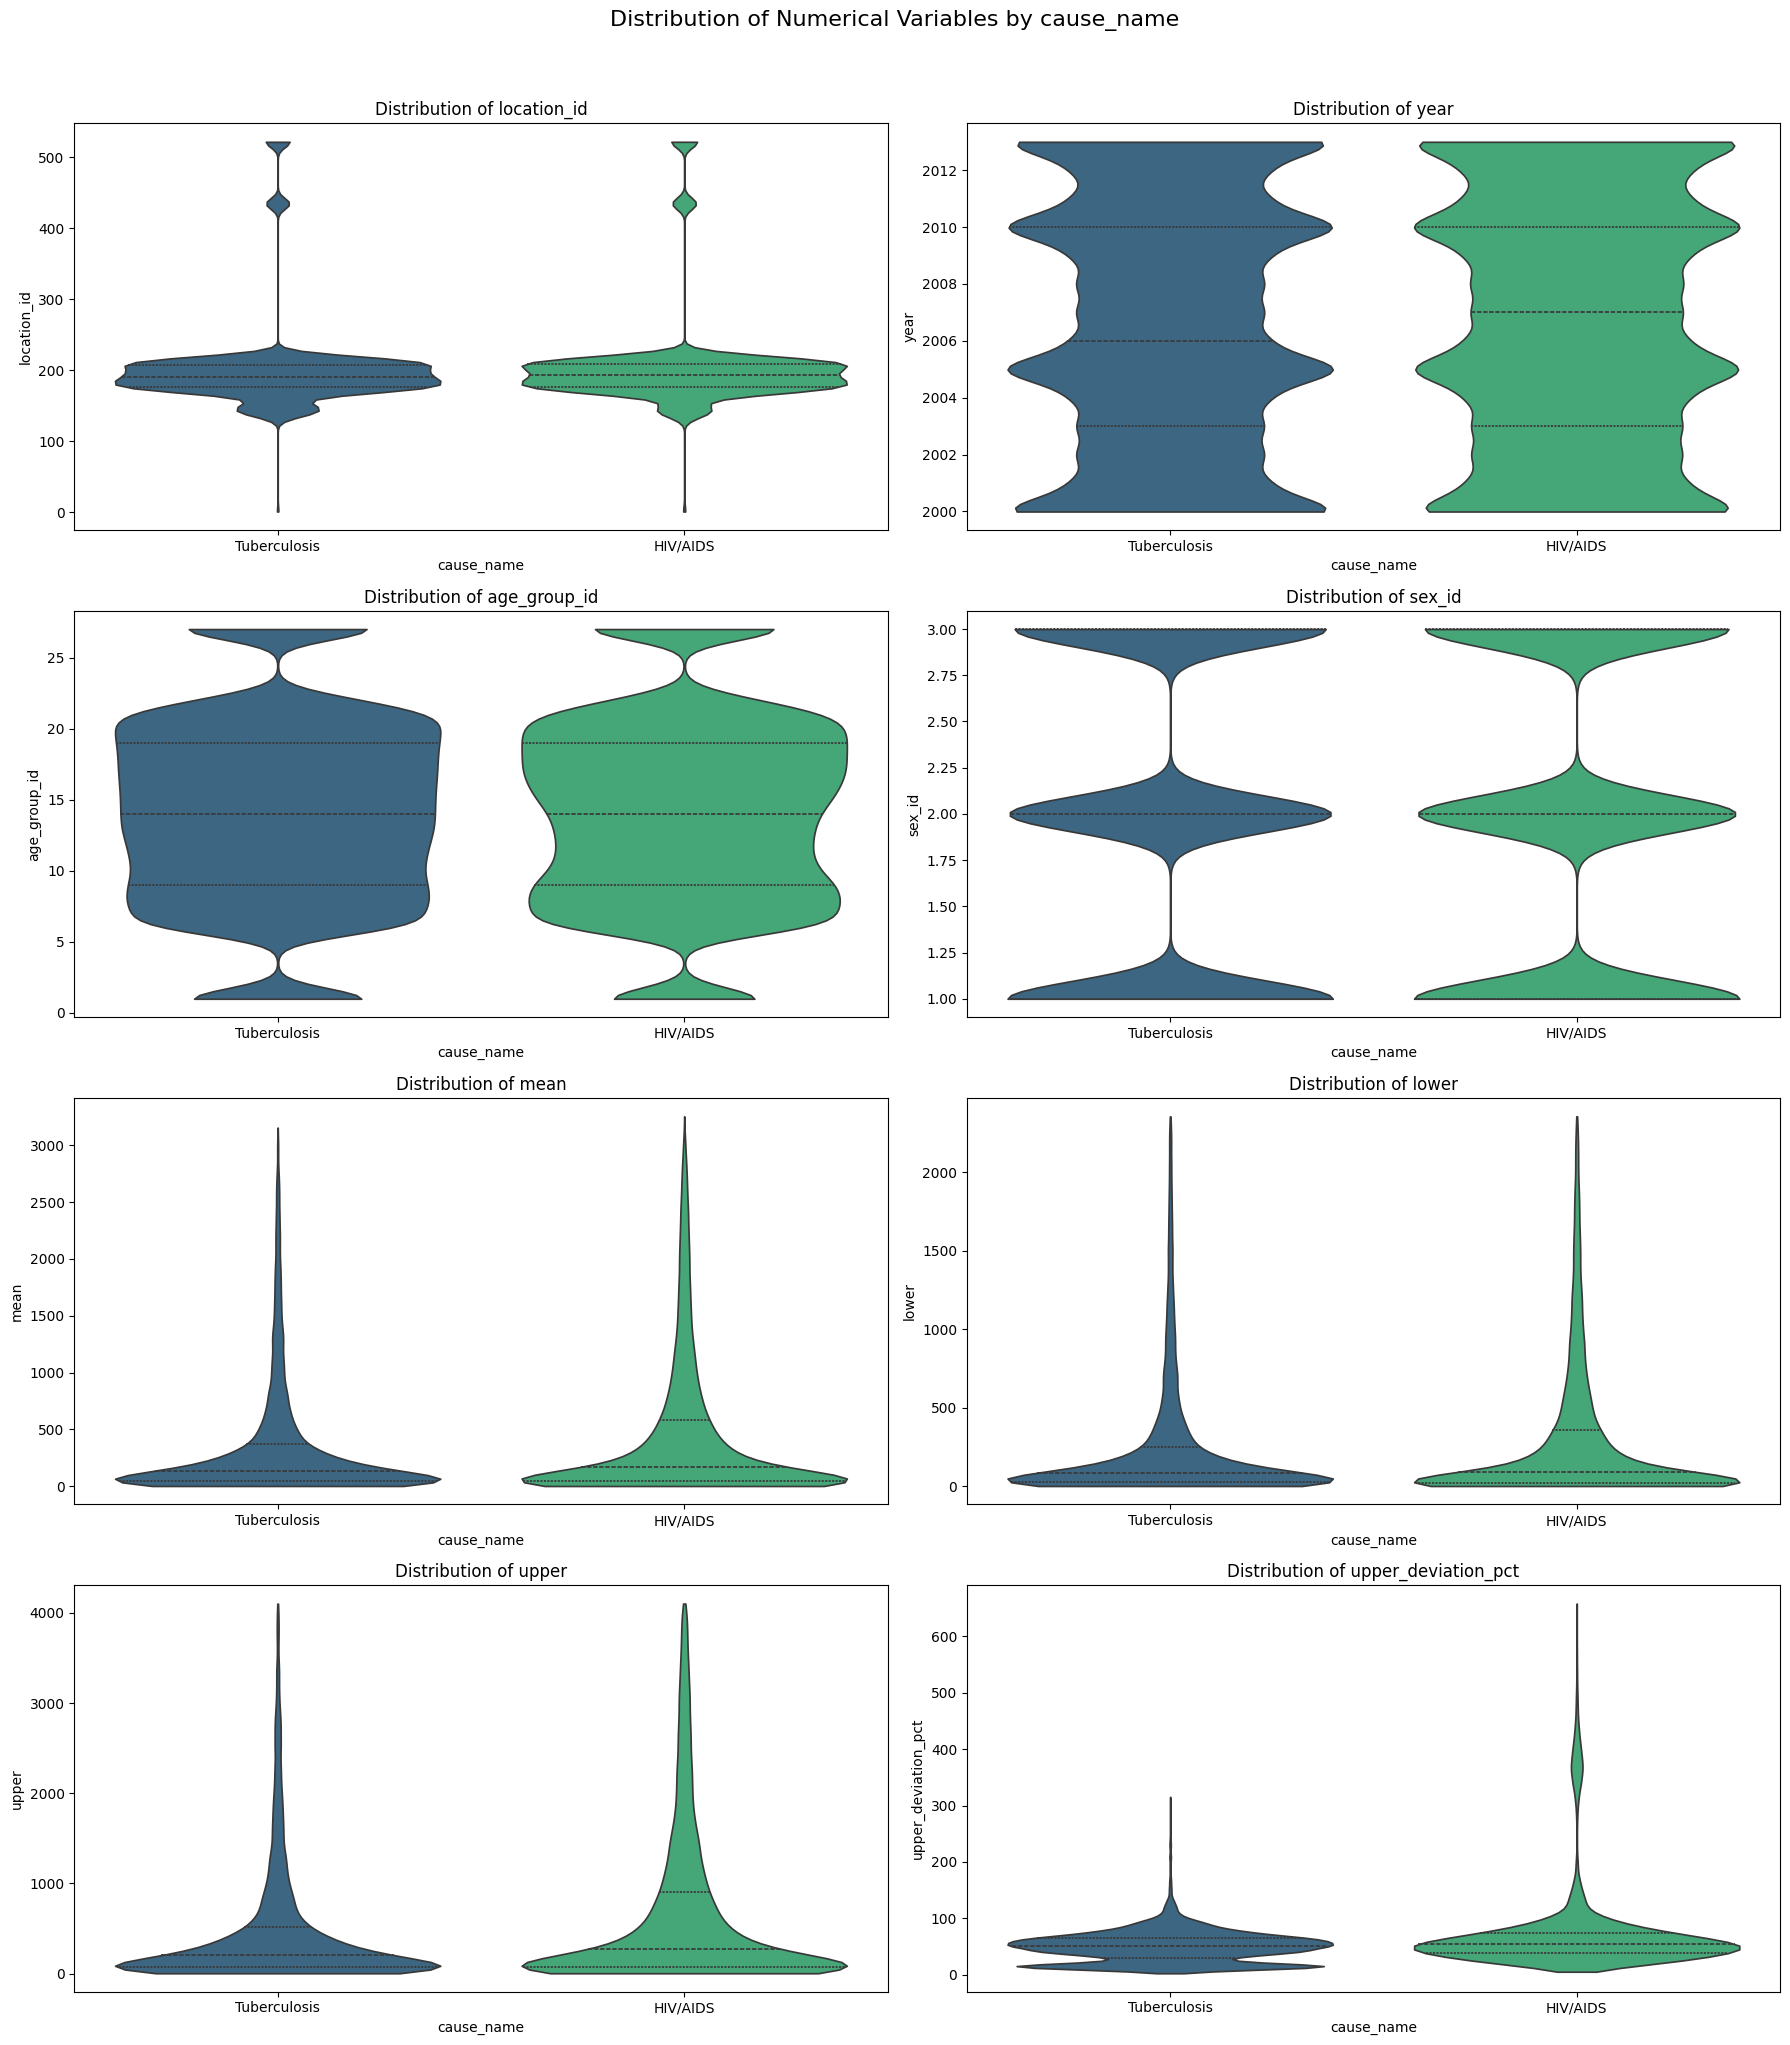

In [81]:
cat = "cause_name"
n_rows = 4
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20)) 
fig.suptitle(f"Distribution of Numerical Variables by {cat}", fontsize=16, y=1.02)
for i, col in enumerate(num_cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.violinplot(
        data=df,
        x=cat,
        y=col,
        ax=axes[row, col_idx], 
        palette="viridis",
        inner="quartile", 
        cut=0
    )
    axes[row, col_idx].set_title(f"Distribution of {col}", fontsize=12)
    axes[row, col_idx].set_xlabel(cat)
plt.tight_layout()
plt.show()

**HIV/AIDS has Higher Magnitude and Uncertainty**

The distributions for mean, lower, upper, and especially upper_deviation_pct show that HIV/AIDS tends to have slightly higher maximum values and significantly higher uncertainty compared to Tuberculosis. 

The most extreme rates and highest percentage deviations are associated with HIV/AIDS.

C:\Users\USER\AppData\Local\Temp\ipykernel_6560\3257955729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\3257955729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\3257955729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\3257955729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

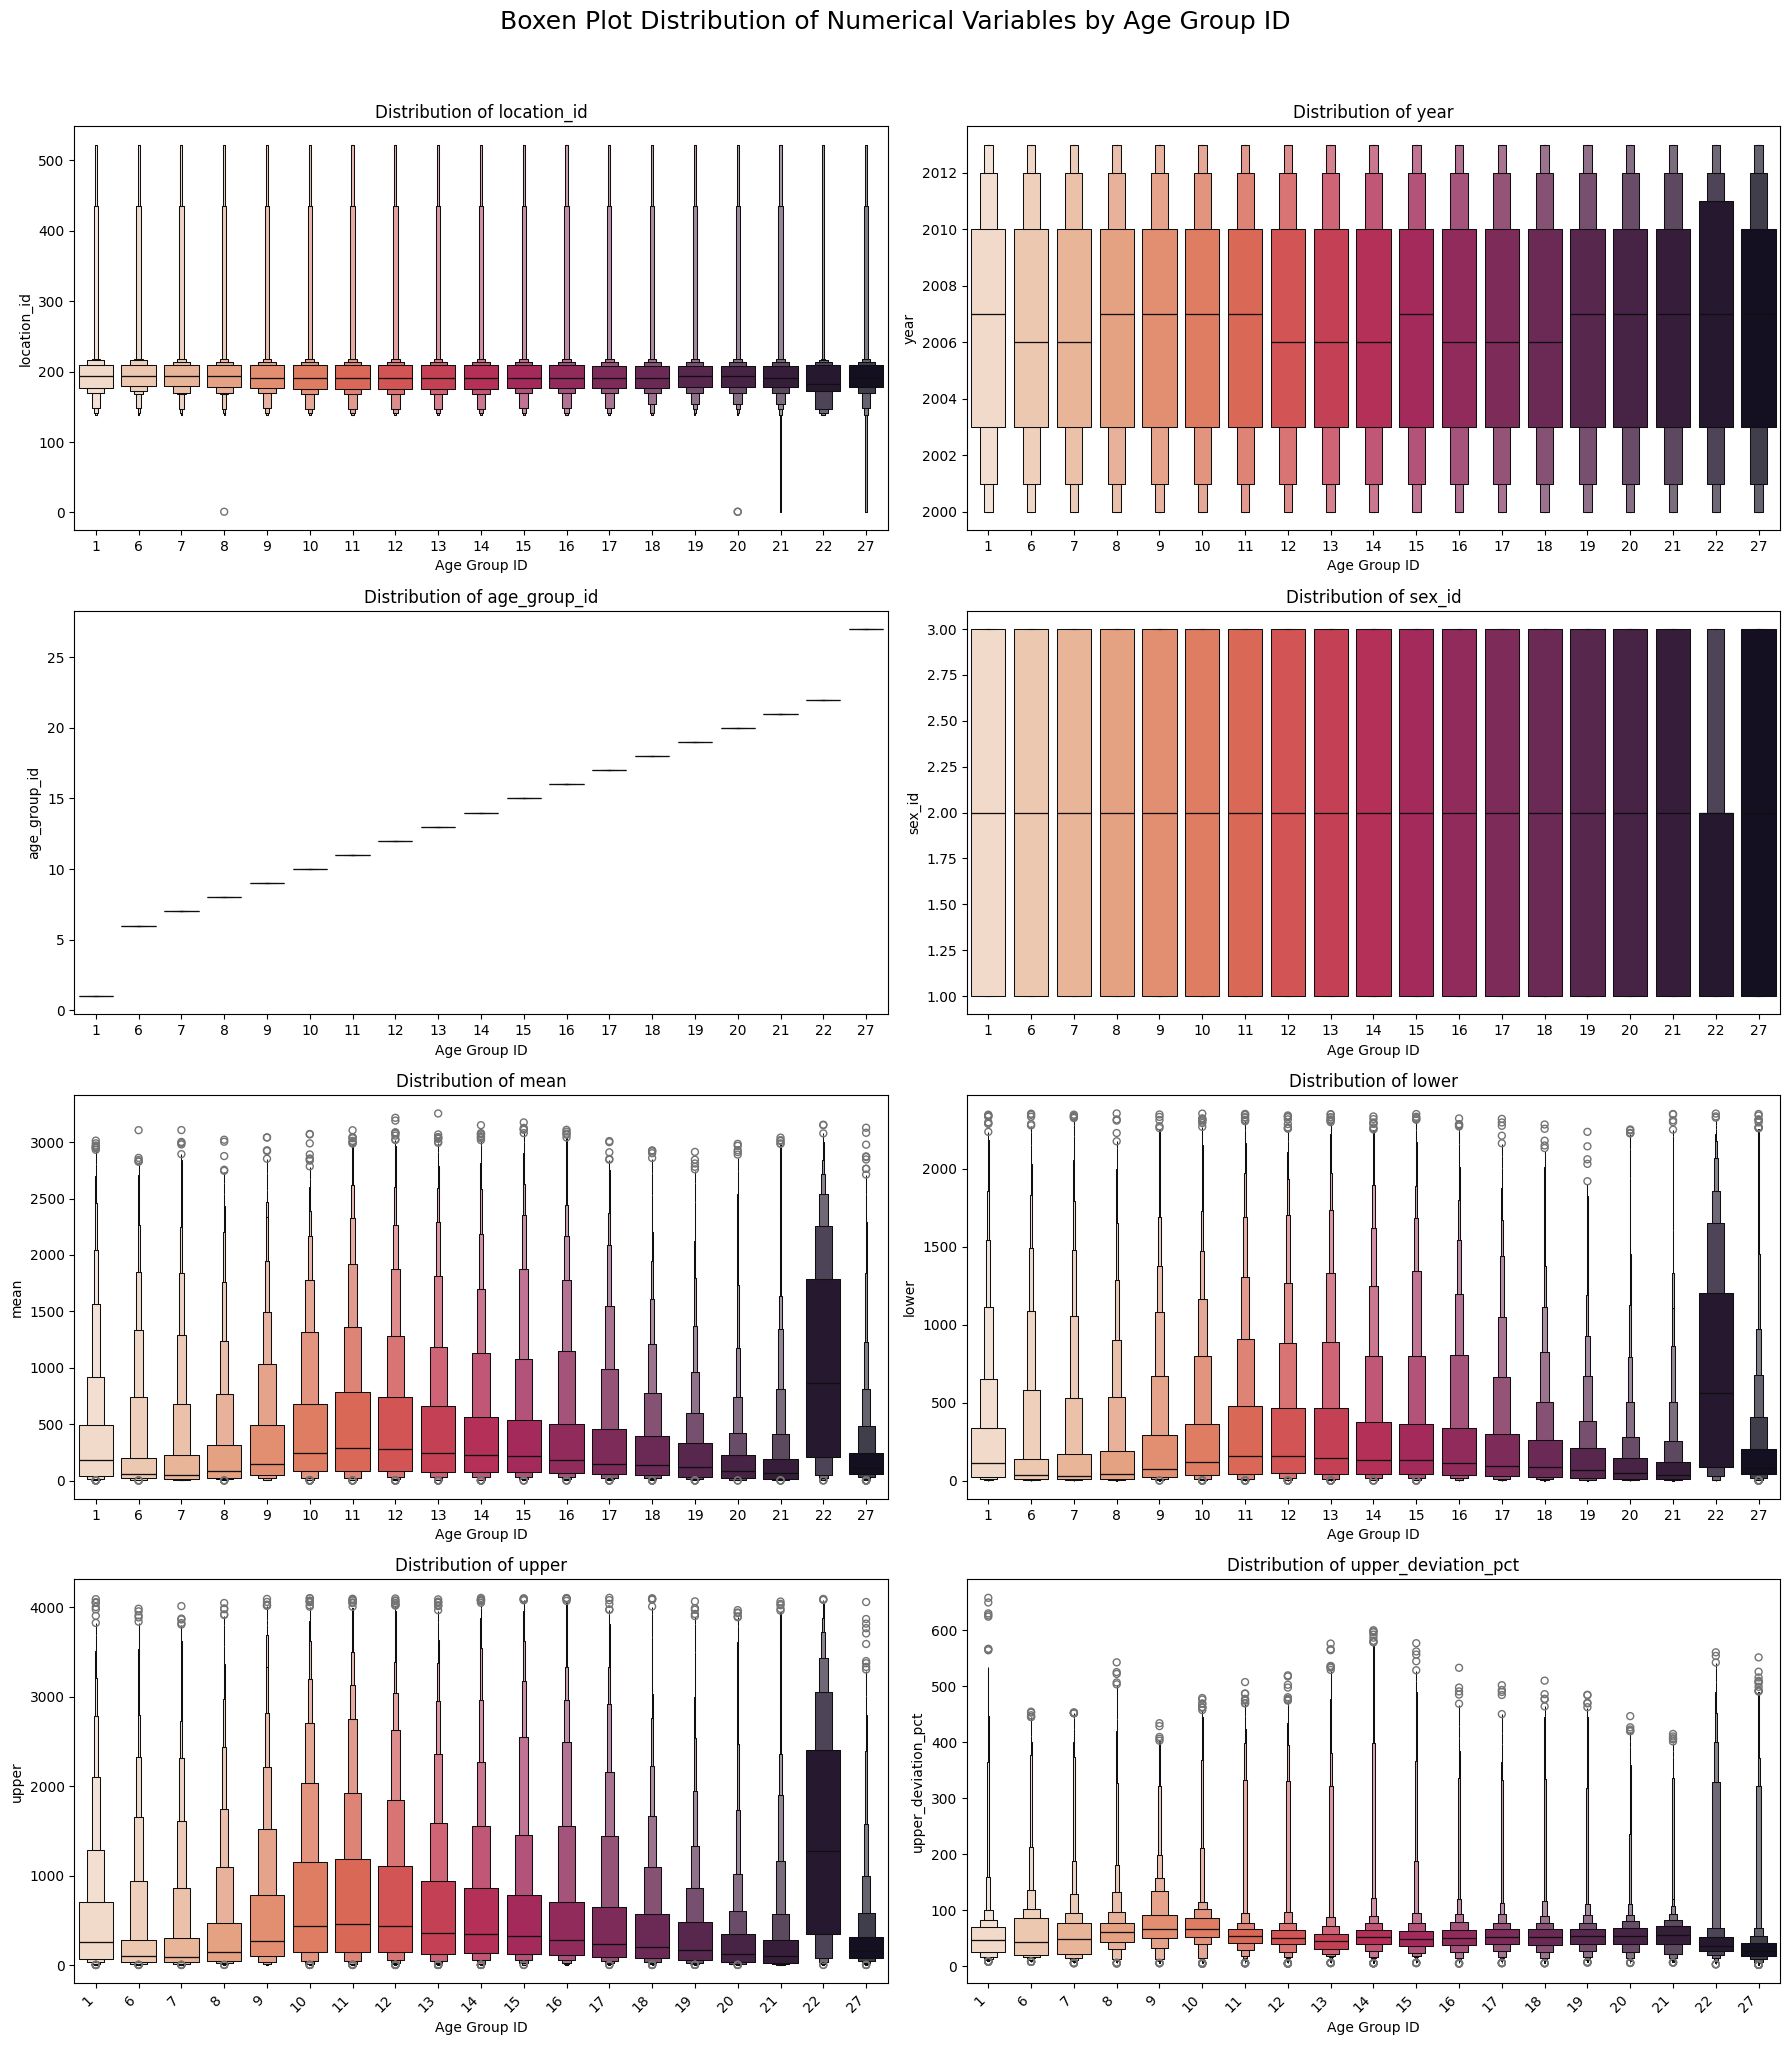

In [86]:
cat = "age_group_id"
n_rows = 4
n_cols = 2
n_plots = len(num_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
fig.suptitle(f"Boxen Plot Distribution of Numerical Variables by Age Group ID", fontsize=18, y=1.02)
for i, col in enumerate(num_cols):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxenplot(
        data=df, 
        x=cat, 
        y=col,
        ax=axes[row, col_idx],
        palette="rocket_r",   
        k_depth="proportion"
    )
    axes[row, col_idx].set_title(f"Distribution of {col}", fontsize=12)
    axes[row, col_idx].set_xlabel("Age Group ID")
    if row == n_rows - 1 or i == n_plots - 1:
        plt.setp(axes[row, col_idx].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_6560\2690994399.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_6560\2690994399.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')


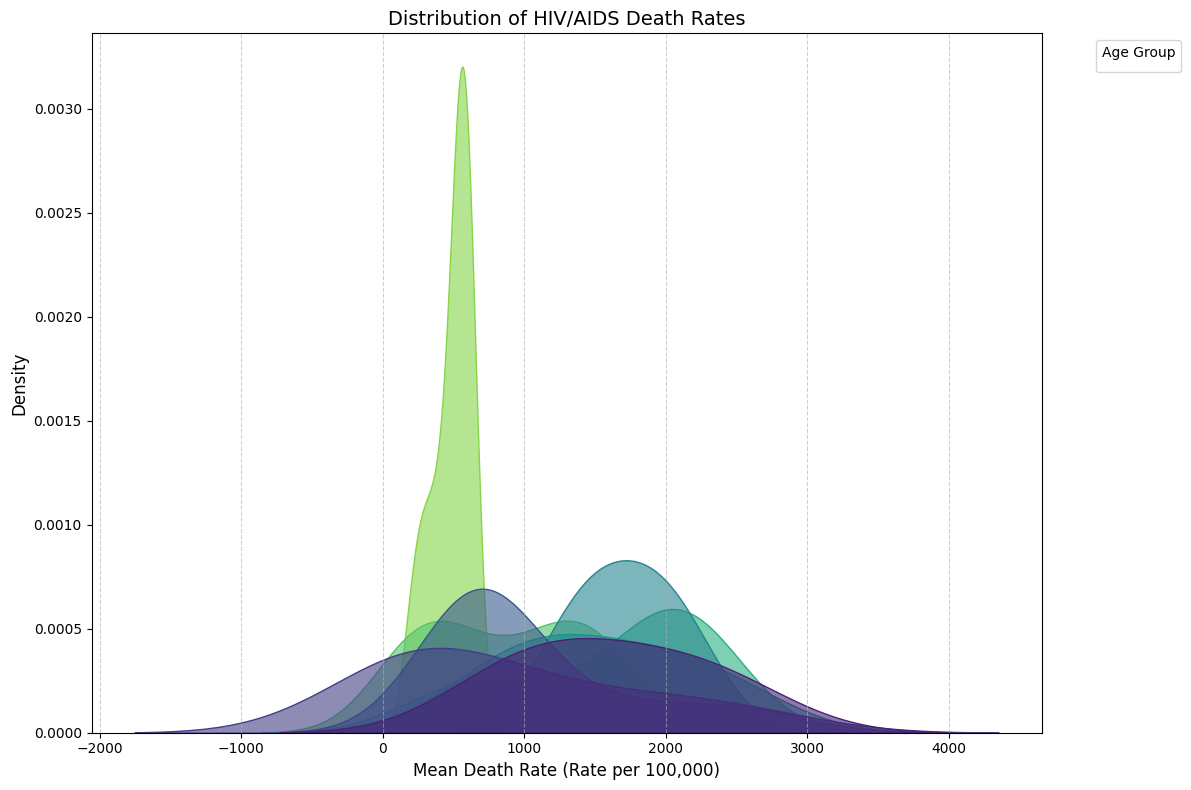

In [87]:
ridge_data = df[
    (df['location_name'] == 'South Africa') & 
    (df['cause_name'] == 'HIV/AIDS') & 
    (df['metric'] == 'Deaths') &
    (df['sex_name'] == 'Both sexes') &
    (~df['age_group_name'].str.contains('All Ages|Standardized'))
].copy()

plt.figure(figsize=(12, 8))

sns.kdeplot(
    data=ridge_data, 
    x='mean', 
    hue='age_group_name', 
    fill=True, 
    common_norm=False, 
    alpha=0.6, 
    linewidth=1,
    palette='viridis' 
)

plt.title('Distribution of HIV/AIDS Death Rates', fontsize=14)
plt.xlabel('Mean Death Rate (Rate per 100,000)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('HIV_AIDS_KDE_Overlap_Age_Distribution.png')

C:\Users\USER\AppData\Local\Temp\ipykernel_6560\3932119172.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


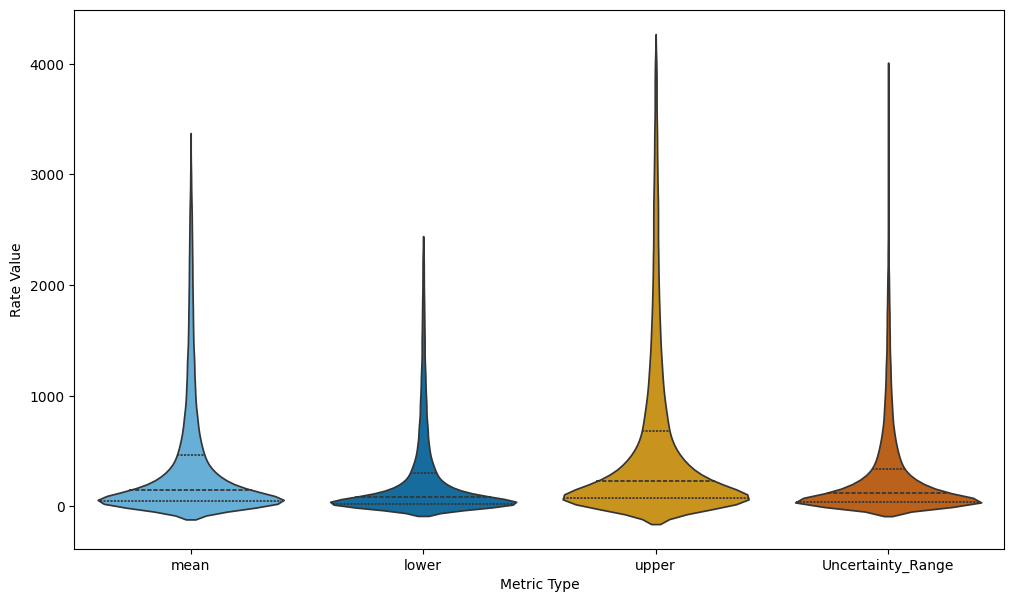

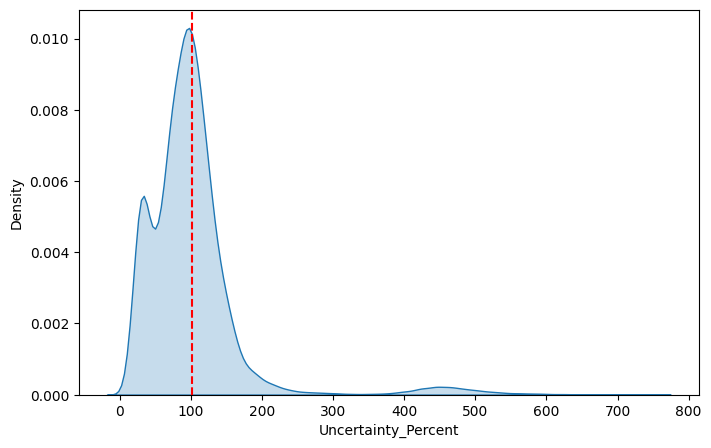

In [10]:
df = pd.read_excel("C:/Users/USER/Downloads/Group_work_cleaned.xlsx")
df['Uncertainty_Range'] = df['upper'] - df['lower']
df['Uncertainty_Percent'] = (df['Uncertainty_Range'] / df['mean']) * 100
africa_countries = df['location_name'].unique()
violin_metrics = ['mean', 'lower', 'upper', 'Uncertainty_Range']
violin_data = df[violin_metrics].melt(var_name='Metric Type', value_name='Rate Value')
plt.figure(figsize=(12, 7))
sns.violinplot(
    x='Metric Type', 
    y='Rate Value', 
    data=violin_data, 
    inner='quartile',
    palette=['#56B4E9', '#0072B2', '#E69F00', '#D55E00']
)
plt.savefig('Rate_Uncertainty_Distribution_Comparison.png')
plt.figure(figsize=(8, 5))
sns.kdeplot(
    df['Uncertainty_Percent'],
    fill=True,
)
plt.axvline(df['Uncertainty_Percent'].mean(), color='red', linestyle='--', label=f'Mean Uncertainty: {df["Uncertainty_Percent"].mean():.2f}%')
plt.savefig('Uncertainty_Percentage_Distribution.png')

In [11]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78651 entries, 0 to 78650
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location_id          78651 non-null  int64  
 1   location_name        78651 non-null  object 
 2   year                 78651 non-null  int64  
 3   age_group_id         78651 non-null  int64  
 4   age_group_name       78651 non-null  object 
 5   sex_id               78651 non-null  int64  
 6   sex_name             78651 non-null  object 
 7   cause_name           78651 non-null  object 
 8   metric               78651 non-null  object 
 9   unit                 78651 non-null  object 
 10  mean                 78651 non-null  float64
 11  lower                78651 non-null  float64
 12  upper                78651 non-null  float64
 13  upper_deviation_pct  78651 non-null  float64
 14  Uncertainty_Range    78651 non-null  float64
 15  Uncertainty_Percent  78651 non-null 

location_id            0
location_name          0
year                   0
age_group_id           0
age_group_name         0
sex_id                 0
sex_name               0
cause_name             0
metric                 0
unit                   0
mean                   0
lower                  0
upper                  0
upper_deviation_pct    0
Uncertainty_Range      0
Uncertainty_Percent    0
dtype: int64

In [12]:
from sklearn.feature_selection import mutual_info_regression

num_df = df.select_dtypes(include='number').dropna()
columns = num_df.columns

mi_matrix = pd.DataFrame(index=columns, columns=columns)

for target in columns:
    y = num_df[target]
    X = num_df.drop(columns=[target])
    
    mi = mutual_info_regression(X, y, random_state=0)
    mi_matrix.loc[target, X.columns] = mi

print(mi_matrix)

                    location_id      year age_group_id    sex_id      mean  \
location_id                 NaN  0.002906     0.026122  0.005017   0.28296   
year                    0.00931       NaN          0.0       0.0  0.005996   
age_group_id           0.030575  0.000542          NaN       0.0  0.082254   
sex_id                      0.0  0.001712          0.0       NaN  0.007378   
mean                   0.281706   0.00561     0.084327  0.008955       NaN   
lower                  0.267026  0.015678     0.071354   0.01403  1.990571   
upper                  0.287066  0.007279     0.088348  0.008543  2.241713   
upper_deviation_pct    0.251907  0.078411     0.155572  0.040049  0.284047   
Uncertainty_Range      0.305954       0.0     0.109668  0.009036    1.1905   
Uncertainty_Percent    0.260062  0.084837     0.150685   0.04573   0.24518   

                        lower     upper upper_deviation_pct Uncertainty_Range  \
location_id          0.268263  0.287627            0.252467 

In [ ]:
print("SUMMARY STATISTICS:")
print(df.describe(), "\n")
print("CATEGORICAL SUMMARY:")
print(df.describe(include=['object']), "\n")

SUMMARY STATISTICS:
        location_id          year  age_group_id        sex_id          mean  \
count  78651.000000  78651.000000  78651.000000  78651.000000  78651.000000   
mean     202.420821   2006.609261     14.030286      1.981615    390.354317   
std       66.201982      4.228652      6.271229      0.814642    569.350347   
min        1.000000   2000.000000      1.000000      1.000000      1.500000   
25%      177.000000   2003.000000      9.000000      1.000000     44.400002   
50%      191.000000   2007.000000     14.000000      2.000000    148.199997   
75%      209.000000   2010.000000     19.000000      3.000000    460.899994   
max      522.000000   2013.000000     27.000000      3.000000   3254.199951   

              lower         upper  upper_deviation_pct  
count  78651.000000  78651.000000         78651.000000  
mean     264.230428    557.224365            61.382590  
std      415.557674    779.590344            60.402832  
min        0.700000      3.400000       

**Measurement Variables**

* The standard deviation (std) is very large compared to the mean, especially for mean (std≈569.35 vs. mean≈390.35).

* The Max values are substantially larger than the 75th percentile (75%). This confirms the high positive skewness and high kurtosis (many outliers) you observed previously.

**Uncertainty (upper_deviation_pct)**

* The average deviation is about 61.38%.

* The maximum deviation is extremely high at 658.25%

**Time/Demographic IDs**

* These variables, which act as identifiers or ranges, have much smaller standard deviations relative to their means, suggesting a more uniform or controlled distribution.

**Cause**

* Tuberculosis is the top cause, appearing *43,928 times*. 

**Sex** 

* Males being the most frequent affected

In [13]:
print(df['metric'].value_counts())

metric
Deaths        63742
Prevalence    14822
Incidence        87
Name: count, dtype: int64


**more Deaths than Prevalence were recorded**

In [14]:
for col in num_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

location_id: 3880 outliers
year: 0 outliers
age_group_id: 0 outliers
sex_id: 0 outliers
mean: 8742 outliers
lower: 9257 outliers
upper: 8209 outliers
upper_deviation_pct: 3820 outliers


**Location** - 3880	outliers

*This suggests that the study has data points from a small group of specific locations (IDs) that are heavily overrepresented or underrepresented compared to the majority, causing them to fall outside the typical range.*

In [15]:
death_df = df[df['metric'].str.lower() == 'deaths']  
print(death_df.shape)

(63742, 16)


In [20]:
death_by_location = death_df.groupby('location_name')['mean'].sum().sort_values(ascending=False)
print(death_by_location.head(10))


location_name
Ethiopia        1.369444e+06
Nigeria         1.181428e+06
South Africa    1.083279e+06
Tanzania        1.045570e+06
Uganda          1.023070e+06
Kenya           1.009326e+06
Mozambique      8.907324e+05
Zambia          8.904244e+05
Malawi          8.319754e+05
Zimbabwe        8.155859e+05
Name: mean, dtype: float64


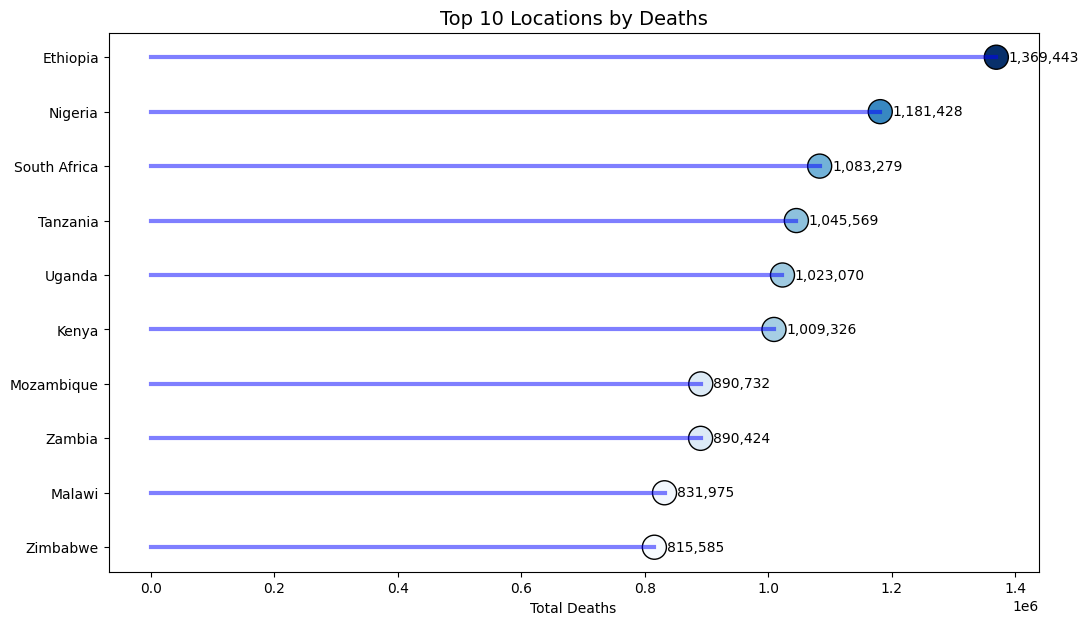

In [ ]:
top10 = death_by_location.head(10)
plt.figure(figsize=(12,7))
for i, val in enumerate(top10.values):
    plt.plot([0, val], [i, i], color='b', alpha=0.5, linewidth=3)
plt.scatter(top10.values, np.arange(len(top10)), s=300, c=top10.values, cmap='Blues', edgecolors='black')
for i, val in enumerate(top10.values):
    plt.text(val + 20000, i, f'{int(val):,}', va='center', fontsize=10)
plt.yticks(np.arange(len(top10)), top10.index.astype(str))
plt.gca().invert_yaxis()  # largest on top
plt.xlabel('Total Deaths')
plt.title('Top 10 Locations by Deaths', fontsize=14)
plt.show()

In [23]:
african_countries = [
    'Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Angola',
    'Central African Republic', 'Congo', 'Equatorial Guinea', 'Gabon', 'Burundi',
    'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi',
    'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
    'Tanzania', 'Uganda', 'Zambia', 'Botswana', 'Lesotho', 'Namibia',
    'South Africa', 'Zimbabwe', 'Benin', 'Burkina Faso', 'Cameroon', 'Chad',
    'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger',
    'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'
]

african_countries_lower = [c.lower() for c in african_countries]


In [24]:
tb_hiv = ['tuberculosis', 'hiv/aids']

disease_df = df[
    df['metric'].str.strip().str.lower() == 'deaths'
]

disease_df = disease_df[
    disease_df['cause_name'].str.strip().str.lower().isin(tb_hiv)
]

print(disease_df.shape)

(63742, 16)


In [25]:
disease_df['region'] = disease_df['location_name'].str.strip().str.lower().apply(
    lambda x: 'africa' if x in african_countries_lower else 'global'
)

**CAUSE METRIC COMPARISON IN AFRICA VS GLOBAL** 

In [27]:
agg_region = disease_df.groupby(['region', 'cause_name'])['mean'].sum().reset_index()
print(agg_region)


   region    cause_name          mean
0  africa      HIV/AIDS  1.136230e+07
1  africa  Tuberculosis  9.754059e+06
2  global      HIV/AIDS  3.367190e+04
3  global  Tuberculosis  1.051200e+03


**DISPLAY OF CAUSE METRIC COMPARISON IN AFRICA VS GLOBAL RATIO**

In [ ]:
pivot = agg_region.pivot(index='cause_name', columns='region', values='mean')
pivot['africa_vs_global_ratio'] = pivot['africa'] / pivot['global']
print(pivot)

region              africa        global  africa_vs_global_ratio
cause_name                                                      
HIV/AIDS      1.136230e+07  33671.899956              337.441514
Tuberculosis  9.754059e+06   1051.200001             9278.975069


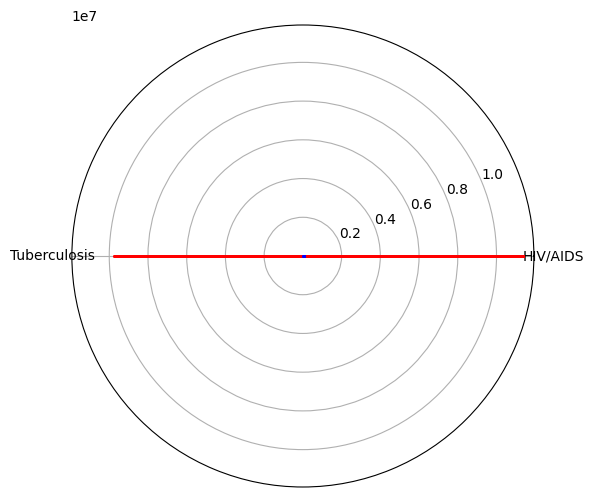

In [ ]:
categories = list(agg_region.index)
N = len(categories)
africa_values = agg_region['africa'].values
global_values = agg_region['global'].values
africa_values = np.append(africa_values, africa_values[0])
global_values = np.append(global_values, global_values[0])
categories += [categories[0]]

In [ ]:
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

ax.plot(angles, africa_values, color='red', linewidth=2, linestyle='solid', label='Africa')
ax.fill(angles, africa_values, color='red', alpha=0.25)

ax.plot(angles, global_values, color='blue', linewidth=2, linestyle='solid', label='Global')
ax.fill(angles, global_values, color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1])
ax.set_title("TB vs HIV Deaths: Africa vs Global", size=14, y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


**GROUP COMPARISONS EXPLORATORY DATA ANALYSIS**

In [33]:
death_df = df[df['metric'] == 'Deaths'].copy()
africa_countries = death_df['location_name'].unique()
africa_countries = africa_countries[africa_countries != 'Global']
death_df['location_group'] = np.where(
    death_df['location_name'].isin(africa_countries),
    'African Countries (Avg)',
    death_df['location_name']
)
comparison_df = death_df[death_df['cause_name'].isin(['HIV/AIDS', 'Tuberculosis'])].copy()
comparative_summary = comparison_df.groupby(['location_group', 'cause_name'])['mean'].agg(
    ['mean', 'std', 'min', 'max', 'count']
).reset_index()
comparative_summary.columns = [
    'Location Group', 'Cause Name', 
    'Avg. Mean Death Rate', 'Std. Dev. of Rate', 
    'Min Rate', 'Max Rate', 'Data Points'
]
comparative_summary = comparative_summary[
    comparative_summary['Location Group'].isin(['Global', 'African Countries (Avg)'])
].sort_values(by=['Location Group', 'Avg. Mean Death Rate'], ascending=[True, False])

comparative_summary

,Location Group,Cause Name,Avg. Mean Death Rate,Std. Dev. of Rate,Min Rate,Max Rate,Data Points
0,African Countries (Avg),HIV/AIDS,392.615650,570.208763,1.700000,3254.199951,28940
1,African Countries (Avg),Tuberculosis,281.088689,460.623798,1.700000,3154.600098,34701
2,Global,HIV/AIDS,570.710169,896.235291,17.200001,2782.199951,59
3,Global,Tuberculosis,25.028571,7.545352,13.100000,41.000000,42


In [34]:
from scipy.stats import ttest_ind

m = df[df.sex_name == "Males"]["mean"]
f = df[df.sex_name == "Females"]["mean"]

t_stat, p_val = ttest_ind(m, f, equal_var=False)
t_stat, p_val

(np.float64(7.7924803178172395), np.float64(6.689196830100594e-15))

**T-Statistic (t),7.792**

This value measures the magnitude of the difference between your observed sample data and what is expected under the null hypothesis, relative to the variability in your data. 

A large absolute T-statistic 7.792 suggests that the observed difference is highly significant.

**P-Value (p),6.689×10−15**

This value represents the probability of observing data as extreme as your sample, assuming the null hypothesis is true 

In [36]:
age_group = "80 plus"

subset = df[df["age_group_name"] == age_group]
prob = (subset["mean"] > 100).mean()

print(f"P(mean > 100 | age_group='{age_group}') = {prob:.3f}")


P(mean > 100 | age_group='80 plus') = 0.396


**There is a 39.6% chance that the mean number of deaths will be greater than 100 for 80+ age group**

In [76]:
age_group = "Under 5"

subset = df[df["age_group_name"] == age_group]
prob = (subset["mean"] > 100).mean()

print(f"P(mean > 100 | age_group='{age_group}') = {prob:.3f}")


P(mean > 100 | age_group='Under 5') = 0.625


**There is a 62.5% chance that the mean number of deaths will be greater than 100 for under 5 age group**

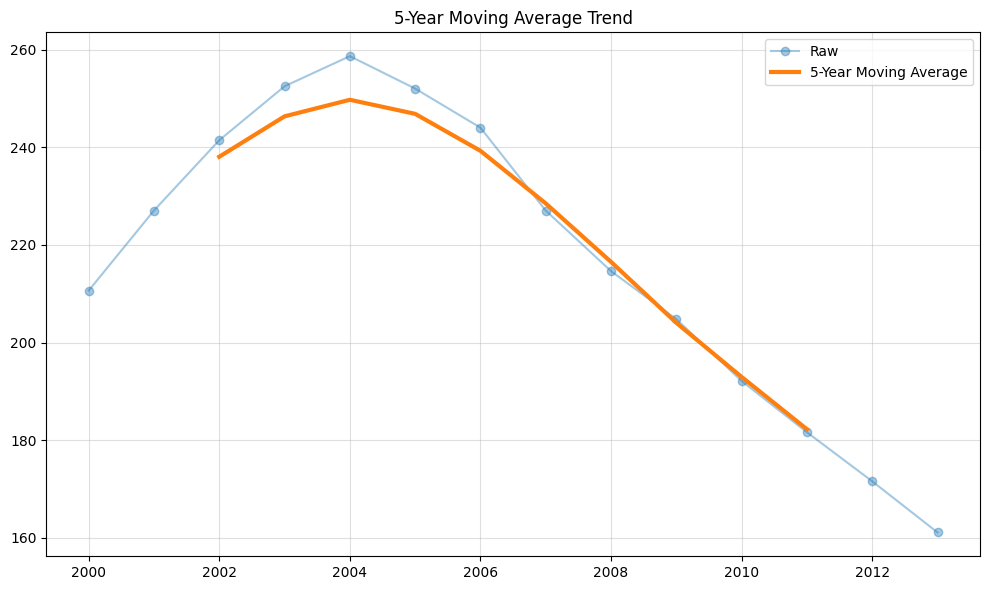

In [53]:
ols_data = df_africa_avg[
    (df_africa_avg['cause_name'] == 'HIV/AIDS') &
    (df_africa_avg['metric'] == 'Deaths') &
    (df_africa_avg['age_group_name'] == 'Age-standardized') &
    (df_africa_avg['sex_name'] == 'Both sexes')
].copy()
ols_data['rolling_5'] = ols_data['mean_rate'].rolling(5, center=True).mean()

plt.figure(figsize=(10,6))
plt.plot(ols_data['year'], ols_data['mean_rate'], 'o-', alpha=0.4, label='Raw')
plt.plot(ols_data['year'], ols_data['rolling_5'], linewidth=3, label='5-Year Moving Average')

plt.legend()
plt.grid(alpha=0.4)
plt.title('5-Year Moving Average Trend')
plt.tight_layout()
plt.show()


In [67]:
df_comparison =pd.read_excel("C:/Users/USER/Downloads/Group_work_cleaned.xlsx")
deadly_age_df = df_comparison[
    (df_comparison['metric'] == 'Deaths') &
    (df_comparison['age_group_name'] != 'Age-standardized') &
    (df_comparison['sex_name'] == 'Both sexes')
age_group_summary = deadly_age_df.groupby(
    ['location_name', 'cause_name', 'age_group_name']
)['mean'].sum().reset_index()
idx_max = age_group_summary.groupby(
    ['location_name', 'cause_name']
)['mean'].idxmax()
most_affected_age_groups = age_group_summary.loc[idx_max]
result_df = most_affected_age_groups[['location_name', 'cause_name', 'age_group_name', 'mean']]
result_df.columns = ['Location Group', 'Cause Name', 'Most Affected Age Group', 'Cumulative Mean Rate']
result_df = result_df.sort_values(by=['Cause Name', 'Location Group']).reset_index(drop=True)
print("Most Affected Age Group by Disease (Cumulative Death Rate):")
print(result_df.to_markdown(index=False, numalign="left", stralign="left"))

Most Affected Age Group by Disease (Cumulative Death Rate):
| Location Group           | Cause Name   | Most Affected Age Group   | Cumulative Mean Rate   |
|:-------------------------|:-------------|:--------------------------|:-----------------------|
| Algeria                  | HIV/AIDS     | All Ages                  | 1599.4                 |
| Angola                   | HIV/AIDS     | 30 to 34                  | 26035.5                |
| Benin                    | HIV/AIDS     | 35 to 39                  | 10929.5                |
| Botswana                 | HIV/AIDS     | 30 to 34                  | 24323                  |
| Burkina Faso             | HIV/AIDS     | 40 to 44                  | 24719.4                |
| Burundi                  | HIV/AIDS     | 35 to 39                  | 20095.4                |
| Cameroon                 | HIV/AIDS     | 50 to 54                  | 26551.5                |
| Central African Republic | HIV/AIDS     | 35 to 39               

**Highest Rates (HIV/AIDS):**

* Ghana: 30,600.9

* Ethiopia: 29,603.2

* Gabon: 28,830.5

* Cameroon: 26,551.5

**Highest Rates (Tuberculosis):** 

* Uganda: 30,553.4

* Zimbabwe: 22,105.3

* Zambia: 21,143.3

* Tanzania: 20,490.9


HIV/AIDS, 30 to 45 years

`The peak age group for the HIV/AIDS burden is typically the prime working-age population`

Tuberculosis,25 to 29 years

`For Tuberculosis, the peak burden appears to be concentrated in a slightly younger working-age group`

**Exceptions**

**Kenya (HIV/AIDS): The most affected group is listed as 5 to 9 years.**

**Ethiopia (HIV/AIDS): The most affected group is 60 to 64 years**

In [65]:
df_comparison = pd.read_excel("C:/Users/USER/Downloads/Group_work_cleaned.xlsx")
hiv_sex_df = df_comparison[
    (df_comparison['cause_name'] == 'HIV/AIDS') &
    (df_comparison['metric'] == 'Deaths') &
    (df_comparison['sex_name'] != 'Both sexes')
].copy()
hiv_sex_agg = hiv_sex_df[hiv_sex_df['age_group_name'] != 'Age-standardized'].copy()
sex_summary = hiv_sex_agg.groupby(
    ['location_name', 'sex_name']
)['mean'].sum().reset_index()
idx_max = sex_summary.groupby(['location_name'])['mean'].idxmax()
most_affected_sex = sex_summary.loc[idx_max]
total_sex_rates = sex_summary.pivot(
    index='location_name',
    columns='sex_name',
    values='mean'
).reset_index()
total_sex_rates.columns.name = None

final_result_df = pd.merge(
    most_affected_sex,
    total_sex_rates,
    on='location_name'
)
final_result_df = final_result_df[['location_name', 'sex_name', 'Males', 'Females']]
final_result_df.columns = ['Location Group', 'Most Affected Sex', 'Total Male Deaths', 'Total Female Deaths']
print("Sex Most Affected by HIV/AIDS Deaths (Cumulative Mean Rate across all Age Groups and Years):")
print(final_result_df.to_markdown(index=False, numalign="left", stralign="left"))

Sex Most Affected by HIV/AIDS Deaths (Cumulative Mean Rate across all Age Groups and Years):
| Location Group           | Most Affected Sex   | Total Male Deaths   | Total Female Deaths   |
|:-------------------------|:--------------------|:--------------------|:----------------------|
| Algeria                  | Males               | 1670.6              | 1375.3                |
| Angola                   | Females             | 88736.3             | 88898.1               |
| Benin                    | Males               | 69279.1             | 64403.2               |
| Botswana                 | Males               | 77848.9             | 74804.4               |
| Burkina Faso             | Females             | 80997.9             | 81138.5               |
| Burundi                  | Males               | 71095.4             | 66675.6               |
| Cameroon                 | Males               | 201952              | 201815                |
| Central African Republic | Males

**In the majority of the listed countries, Males have a higher aggregate mean death total.**

**Countries like Comoros and Egypt have very low total death figures**